In [2]:
import os
from collections import defaultdict
import wave
import matplotlib.pyplot as plt

# Cleaning

## File Cleaning 

In [3]:
PATH = '../Dataset/kick_dataset'

In [4]:
# Initialize a dictionary to count file extensions and a counter for folders
file_extensions_count = defaultdict(int)
folder_count = 0

# Walk through the directory
for root, dirs, files in os.walk(PATH):
    folder_count += len(dirs)  # Count folders in the current directory
    for file in files:
        ext = os.path.splitext(file)[1]  # Get the file extension
        file_extensions_count[ext] += 1  # Increment the count for this extension

# Print the results
print(f"Number of folders: {folder_count}")
for ext, count in file_extensions_count.items():
    print(f"Extension {ext}: {count} files")

Number of folders: 47
Extension .wav: 2494 files
Extension .zpa: 1 files
Extension .aif: 31 files
Extension .asd: 157 files


In [5]:
# Function to delete specified file extensions
def delete_files_with_extensions(path, extensions_to_delete):
    for root, dirs, files in os.walk(path):
        for file in files:
            ext = os.path.splitext(file)[1]
            if ext in extensions_to_delete:
                os.remove(os.path.join(root, file))

# List of extensions to delete
extensions_to_delete = ['.zpa', '.aif', '.asd']

# Delete the files
delete_files_with_extensions(PATH, extensions_to_delete)

In [6]:
# Initialize a dictionary to count file extensions and a counter for folders
file_extensions_count = defaultdict(int)
folder_count = 0

# Walk through the directory
for root, dirs, files in os.walk(PATH):
    folder_count += len(dirs)  # Count folders in the current directory
    for file in files:
        ext = os.path.splitext(file)[1]  # Get the file extension
        file_extensions_count[ext] += 1  # Increment the count for this extension

# Print the results
print(f"Number of folders: {folder_count}")
for ext, count in file_extensions_count.items():
    print(f"Extension {ext}: {count} files")

Number of folders: 47
Extension .wav: 2494 files


## Explore audio details

In [17]:
# Dictionaries to count durations and sample rates
duration_count = defaultdict(int)
sample_rate_count = defaultdict(int)
mono_count = 0
stereo_count = 0
error_count = 0

# Function to process .wav files
def process_wav_files(path):
    global mono_count, stereo_count, error_count
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                try:
                    file_path = os.path.join(root, file)
                    with wave.open(file_path, 'r') as wav_file:
                        sample_rate = wav_file.getframerate()
                        num_frames = wav_file.getnframes()
                        num_channels = wav_file.getnchannels()
                        duration = num_frames / sample_rate

                        duration_count[round(duration, 2)] += 1
                        sample_rate_count[sample_rate] += 1

                        if num_channels == 1:
                            mono_count += 1
                        elif num_channels == 2:
                            stereo_count += 1
                except:
                    print(file)
                    error_count += 1

# Process the .wav files
process_wav_files(PATH)

print('Number of error',error_count)

KSHMR Trap Top Kick 01.wav
KSHMR Trap Top Kick 04.wav
KSHMR Trap Top Kick 05.wav
KSHMR Simple 808 - A Hi.wav
KSHMR Simple 808 - A Lo.wav
KSHMR Simple 808 - A# Hi.wav
KSHMR Simple 808 - A# Lo.wav
KSHMR Simple 808 - B Hi.wav
KSHMR Simple 808 - B Lo.wav
KSHMR Simple 808 - C Hi.wav
KSHMR Simple 808 - C Lo.wav
KSHMR Simple 808 - C# Hi.wav
KSHMR Simple 808 - C# Lo.wav
KSHMR Simple 808 - D Hi.wav
KSHMR Simple 808 - D Lo.wav
KSHMR Simple 808 - D# Hi.wav
KSHMR Simple 808 - D# Lo.wav
KSHMR Simple 808 - E Hi.wav
KSHMR Simple 808 - E Lo.wav
KSHMR Simple 808 - E.wav
KSHMR Simple 808 - F Hi.wav
KSHMR Simple 808 - F Lo.wav
KSHMR Simple 808 - F# Hi.wav
KSHMR Simple 808 - F# Lo.wav
KSHMR Simple 808 - G Hi.wav
KSHMR Simple 808 - G Lo.wav
KSHMR Simple 808 - G# Hi.wav
KSHMR Simple 808 - G# Lo.wav
KSHMR Simple 808 - G# LoLo.wav
VEH1 Hard Kick - 139.wav
Number of error 30


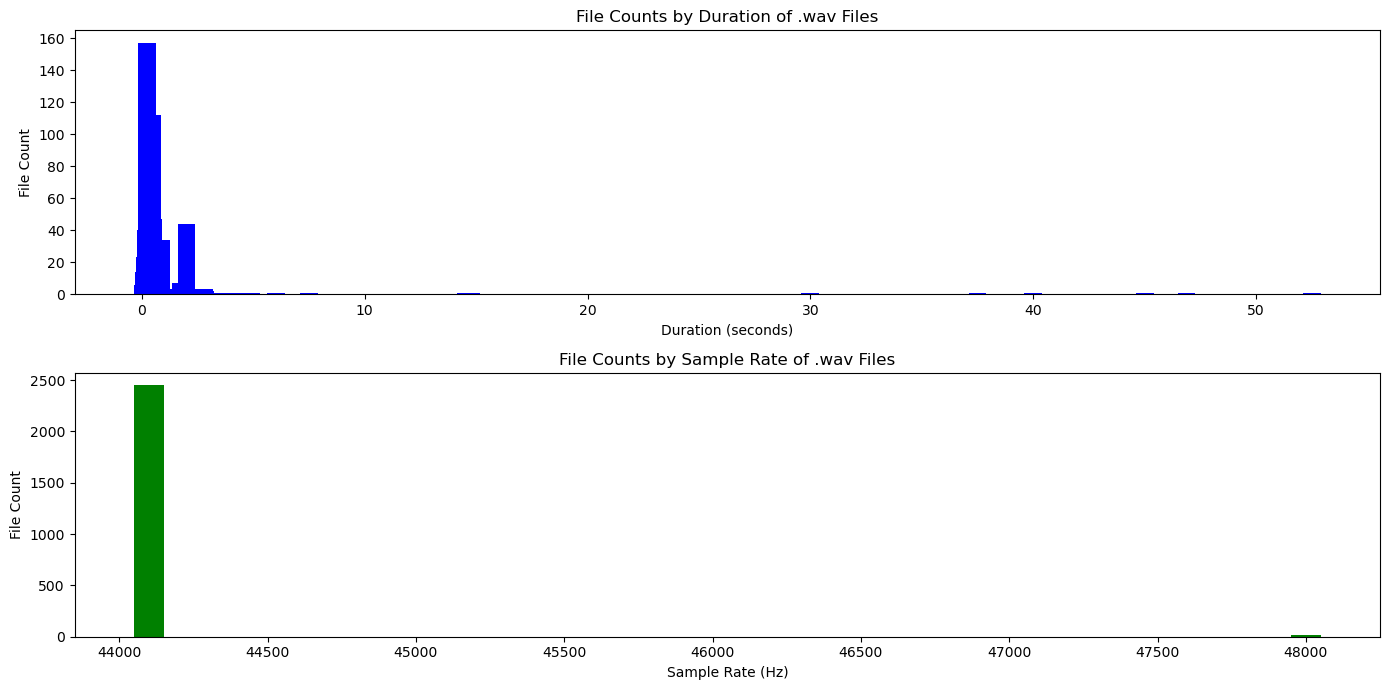

Number of mono .wav files: 0
Number of stereo .wav files: 2464


In [23]:
# Plot the file counts by duration
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.bar(duration_count.keys(), duration_count.values(), color='b')
plt.xlabel('Duration (seconds)')
plt.ylabel('File Count')
plt.title('File Counts by Duration of .wav Files')

# Plot the file counts by sample rate
plt.subplot(2, 1, 2)
plt.bar(sample_rate_count.keys(), sample_rate_count.values(), width=[100, 100], color='g')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('File Count')
plt.title('File Counts by Sample Rate of .wav Files')

plt.tight_layout()
plt.show()

# Print the number of stereo and mono .wav files
print(f"Number of mono .wav files: {mono_count}")
print(f"Number of stereo .wav files: {stereo_count}")

In [24]:
sample_rate_count.keys(), sample_rate_count.values()

(dict_keys([48000, 44100]), dict_values([15, 2449]))

## Data Cleaning (Advanced)

In [25]:
# Function to delete specified .wav files
def delete_unwanted_wav_files(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                try:
                    with wave.open(file_path, 'r') as wav_file:
                        sample_rate = wav_file.getframerate()
                        num_frames = wav_file.getnframes()
                        duration = num_frames / sample_rate

                        # Delete file if duration > 5 seconds or sample rate != 44100
                        if duration > 5 or sample_rate != 44100:
                            os.remove(file_path)
                except:
                    # If the file cannot be loaded, delete it
                    os.remove(file_path)

# Delete unwanted .wav files
delete_unwanted_wav_files(PATH)


In [26]:
# Dictionaries to count durations and sample rates
duration_count = defaultdict(int)
sample_rate_count = defaultdict(int)
mono_count = 0
stereo_count = 0
error_count = 0

# Function to process .wav files
def process_wav_files(path):
    global mono_count, stereo_count, error_count
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                try:
                    file_path = os.path.join(root, file)
                    with wave.open(file_path, 'r') as wav_file:
                        sample_rate = wav_file.getframerate()
                        num_frames = wav_file.getnframes()
                        num_channels = wav_file.getnchannels()
                        duration = num_frames / sample_rate

                        duration_count[round(duration, 2)] += 1
                        sample_rate_count[sample_rate] += 1

                        if num_channels == 1:
                            mono_count += 1
                        elif num_channels == 2:
                            stereo_count += 1
                except:
                    print(file)
                    error_count += 1

# Process the .wav files
process_wav_files(PATH)

print('Number of error',error_count)

Number of error 0


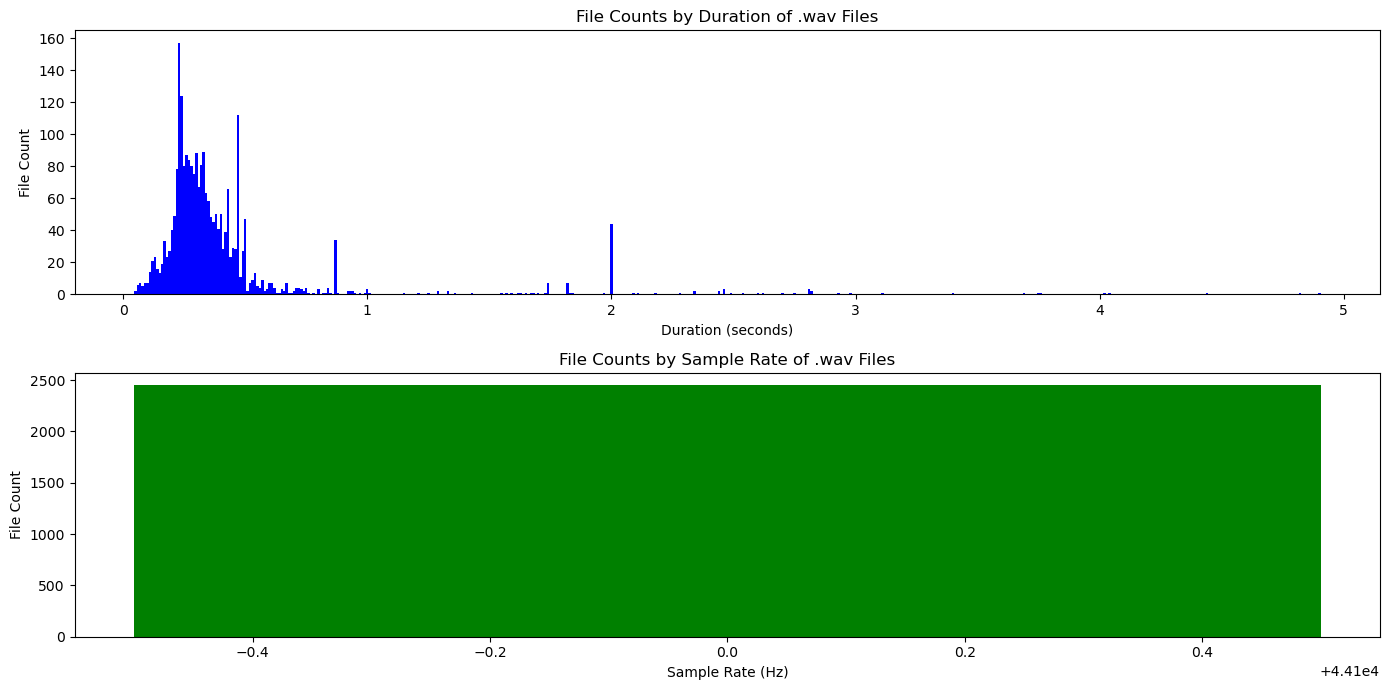

Number of mono .wav files: 0
Number of stereo .wav files: 2448


In [28]:
# Plot the file counts by duration
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.bar(duration_count.keys(), duration_count.values(), len(duration_count.values())*[0.01], color='b')
plt.xlabel('Duration (seconds)')
plt.ylabel('File Count')
plt.title('File Counts by Duration of .wav Files')

# Plot the file counts by sample rate
plt.subplot(2, 1, 2)
plt.bar(sample_rate_count.keys(), sample_rate_count.values(), width=1, color='g')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('File Count')
plt.title('File Counts by Sample Rate of .wav Files')

plt.tight_layout()
plt.show()

# Print the number of stereo and mono .wav files
print(f"Number of mono .wav files: {mono_count}")
print(f"Number of stereo .wav files: {stereo_count}")

### renaming without '#'

In [3]:
def rename_files_with_forbidden_char(path, old_char='#', new_char='hach'):
    for root, dirs, files in os.walk(path):
        for file in files:
            if old_char in file:
                new_file_name = file.replace(old_char, new_char)
                old_file_path = os.path.join(root, file)
                new_file_path = os.path.join(root, new_file_name)
                os.rename(old_file_path, new_file_path)
                print(f"Renamed '{old_file_path}' to '{new_file_path}'")

# Example usage:
rename_files_with_forbidden_char(PATH)

Renamed '../Dataset/kick_dataset\Big Kicks\Headhunterz - Kick (F#).wav' to '../Dataset/kick_dataset\Big Kicks\Headhunterz - Kick (Fhach).wav'
Renamed '../Dataset/kick_dataset\Big Kicks\KSHMR Big Kick 09 (F#).wav' to '../Dataset/kick_dataset\Big Kicks\KSHMR Big Kick 09 (Fhach).wav'
Renamed '../Dataset/kick_dataset\Big Kicks\KSHMR Big Kick 10 (F#).wav' to '../Dataset/kick_dataset\Big Kicks\KSHMR Big Kick 10 (Fhach).wav'
Renamed '../Dataset/kick_dataset\Big Kicks\KSHMR Big Kick 11 (F#).wav' to '../Dataset/kick_dataset\Big Kicks\KSHMR Big Kick 11 (Fhach).wav'
Renamed '../Dataset/kick_dataset\Big Kicks\MTK2 Trance Kick 175 G#.wav' to '../Dataset/kick_dataset\Big Kicks\MTK2 Trance Kick 175 Ghach.wav'
Renamed '../Dataset/kick_dataset\KSHMR_Big_Kicks\KSHMR_Big_Kick_03_D#.wav' to '../Dataset/kick_dataset\KSHMR_Big_Kicks\KSHMR_Big_Kick_03_Dhach.wav'
Renamed '../Dataset/kick_dataset\KSHMR_Big_Kicks\KSHMR_Big_Kick_04_D#.wav' to '../Dataset/kick_dataset\KSHMR_Big_Kicks\KSHMR_Big_Kick_04_Dhach.wav'


### renaming without '&'

In [4]:
def rename_files_with_forbidden_char(path, old_char='&', new_char='and'):
    for root, dirs, files in os.walk(path):
        for file in files:
            if old_char in file:
                new_file_name = file.replace(old_char, new_char)
                old_file_path = os.path.join(root, file)
                new_file_path = os.path.join(root, new_file_name)
                os.rename(old_file_path, new_file_path)
                print(f"Renamed '{old_file_path}' to '{new_file_path}'")

# Example usage:
rename_files_with_forbidden_char(PATH)

Renamed '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long & Tonal 001.wav' to '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long and Tonal 001.wav'
Renamed '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long & Tonal 002.wav' to '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long and Tonal 002.wav'
Renamed '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long & Tonal 003.wav' to '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long and Tonal 003.wav'
Renamed '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long & Tonal 004.wav' to '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long and Tonal 004.wav'
Renamed '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long & Tonal 005.wav' to '../Dataset/kick_dataset\VAD1 Kicks\VAD1 Long Tonal Kicks\VAD1 Kick Long and Tonal 005.wav'
Renamed '../Dataset/kick_dataset\VA

# Dataset

In [44]:
from torch.utils.data import Dataset
import torchaudio
import torch

class KickDataset(Dataset):
    def __init__(self, path = "", sr = 44100, duration = 1):
                 
        self.path = path
        self.sr = sr
        self.duration = duration
        self.sample_length = int(sr * duration)
        self.wav_files = self._create_index_table()

    def _create_index_table(self):
        wav_files = []
        for root, _, files in os.walk(self.path):
            for file in files:
                if file.endswith('.wav'):
                    relative_path = os.path.join(root, file)
                    wav_files.append(relative_path)
        return wav_files
    
    def load_all(self, limit=None):
        limit = len(self) if limit is None else min(limit, len(self))
        self.data = torch.zeros((limit, 1, self.sample_length))

        for i in range(limit):
            self.data[i] = self.load_wav(self.wav_files[i])

    def __len__(self):
        return len(self.wav_files)

    def __getitem__(self, idx):
        return self.data[idx]
    
    def load_wav(self, relative_path):
        # Load audio file
        waveform, sample_rate = torchaudio.load(relative_path, normalize=True)

        # Ensure mono by averaging channels if necessary
        if waveform.size(0) > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Resample if sample rate is different from cfg
        if sample_rate != self.sr:
            transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=self.sr)
            waveform = transform(waveform)

        # Normalize the waveform
        waveform = waveform / waveform.abs().max()

        # Pad or trim to the desired sample length
        if waveform.size(1) < self.sample_length:
            pad_size = self.sample_length - waveform.size(1)
            waveform = torch.nn.functional.pad(waveform, (0, pad_size))
        elif waveform.size(1) > self.sample_length:
            waveform = waveform[:, :self.sample_length]

        return waveform

    def show_sample(self, idx):
        waveform = self.load_wav(self.wav_files[idx])
        print("Name  :",self.wav_files[idx])
        print("Shape :",waveform.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(waveform.t().numpy())
        plt.title(f"Waveform of sample at index {idx}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.show()

data_cfg = {
    'path': PATH,
    'sr': 22050,
    'duration': 0.3, # seconds
}

# Create dataset instance
dataset = KickDataset(**data_cfg)

In [45]:
len(dataset)

2448

Name  : ../Dataset/kick_dataset\Acoustic Kicks\KSHMR Acoustic Kick 02.wav
Shape : torch.Size([1, 6615])


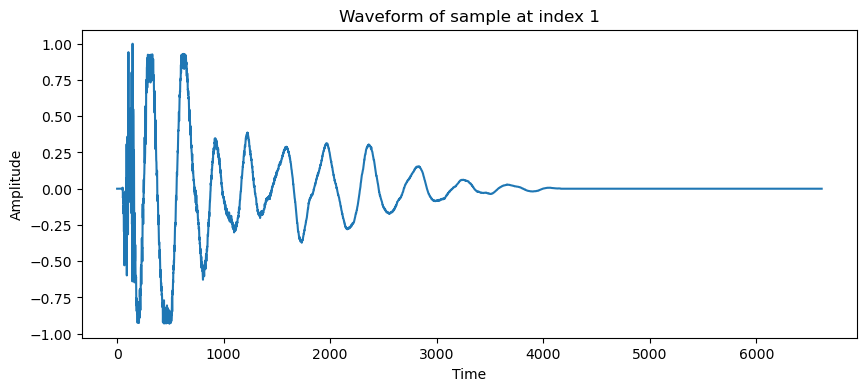

In [46]:
dataset.show_sample(1)

In [47]:
dataset.load_all(40)

In [48]:
dataset[35].shape

torch.Size([1, 6615])